In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

Load the file emails.csv

In [2]:
df = pd.read_csv('emails.csv')

Display some data

In [3]:
df.head()

,email,rec,elen,attch,slen,spam
0,eli302@outlook.com,10,235,1,35,1
1,eli194@outlook.com,3,211,1,19,0
2,eli415@me.com,17,232,1,69,1
3,eli105@aws.com,5,175,0,14,0
4,eli40@aws.com,5,67,1,10,0


In [4]:
df.shape

(1715, 6)

Use describe to see some stats

In [5]:
df.describe()

,rec,elen,attch,slen,spam
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,4.995335,168.602915,0.514869,16.709038,0.268805
std,5.070101,153.152677,0.499925,8.348653,0.443467
min,1.000000,2.000000,0.000000,10.000000,0.000000
25%,2.000000,88.500000,0.000000,12.000000,0.000000
50%,4.000000,144.000000,1.000000,15.000000,0.000000
75%,5.000000,206.000000,1.000000,18.000000,1.000000
max,24.000000,1089.000000,1.000000,70.000000,1.000000


How many spam emails we have?

In [6]:
df.spam.value_counts()

0    1254
1     461
Name: spam, dtype: int64

Use countplot to see how many ham/spam

<AxesSubplot:xlabel='spam', ylabel='count'>

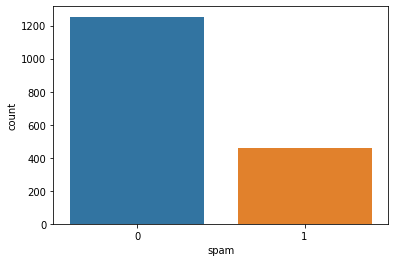

In [7]:
sns.countplot(x='spam', data=df)

Use distplot to see the email len distribution

<AxesSubplot:xlabel='elen'>

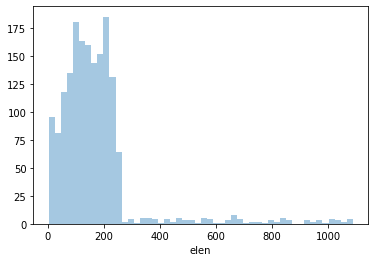

In [8]:
sns.distplot(df.elen, kde=False)

How many emails with len > 245 are spam?

In [9]:
type(df[df.elen > 245]['spam'])

pandas.core.series.Series

In [10]:
df[df.elen > 245]['spam'].index

Int64Index([  24,   56,   61,   69,   76,   89,   90,   95,   97,   98,
            ...
            1591, 1611, 1619, 1625, 1631, 1647, 1655, 1668, 1684, 1703],
           dtype='int64', length=144)

In [11]:
df[df.elen > 245]['spam'].index

Int64Index([  24,   56,   61,   69,   76,   89,   90,   95,   97,   98,
            ...
            1591, 1611, 1619, 1625, 1631, 1647, 1655, 1668, 1684, 1703],
           dtype='int64', length=144)

Use countplot to see if there is any relation between attachment and spam

<AxesSubplot:xlabel='attch', ylabel='count'>

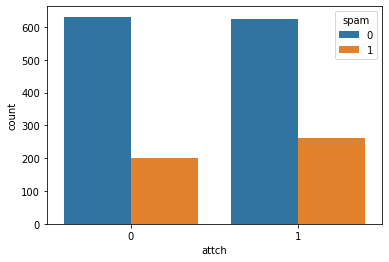

In [12]:
sns.countplot(x='attch', hue='spam', data=df)

Use countplot to see if there is any relation between number of rec. and spam

<AxesSubplot:xlabel='rec', ylabel='count'>

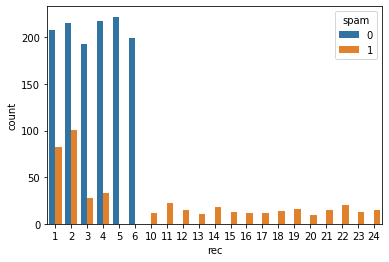

In [13]:
sns.countplot(x='rec', hue='spam', data=df)

build the model, split to train and test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.head(2)

,email,rec,elen,attch,slen,spam
0,eli302@outlook.com,10,235,1,35,1
1,eli194@outlook.com,3,211,1,19,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['email', 'spam'], axis=1), 
                                                    df.spam, test_size=0.33, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pred = model.predict(X_test)

Create a classification report

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       412
           1       1.00      0.58      0.74       154

    accuracy                           0.89       566
   macro avg       0.93      0.79      0.83       566
weighted avg       0.90      0.89      0.88       566



Create a confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_test, pred)

array([[412,   0],
       [ 64,  90]], dtype=int64)

In [24]:
X_train.head(2)

,rec,elen,attch,slen
1037,4,222,1,16
1201,5,182,0,16


Check if email with 3 rec, len=59, no attachment and subject len=14 is a spam

In [25]:
model.predict(np.array( [3, 59, 0, 14]  ).reshape(1,-1))[0]

0

Check if email with 12 rec, len=159, no attachment and subject len=24 is a spam

In [26]:
model.predict(np.array( [12, 159, 0, 24]  ).reshape(1,-1))[0]

1